# Importación de librerías

In [4]:
!pip install openpyxl==3.1.5

In [5]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Carga del dataset

In [8]:
# Lectura y guardado del dataset
df = pd.read_excel('./Dataset_Alzheimer.xlsx')

# Eliminando la columna 'DoctorInCharge' por irrelevancia
df = df.drop('DoctorInCharge', axis=1)

# Eliminando la columna 'PatientID' por irrelevancia
df = df.drop('PatientID', axis=1)
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0.0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0.0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0.0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0.0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0.0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0.0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [9]:
#Mostramos la cantidad de registros del DataSet
cant_registros_inicial = len(df.index)
print('Cantidad de columnas: %i. Cantidad de registros: %i'\
      %(len(df.columns), len(df.index)))

Cantidad de columnas: 33. Cantidad de registros: 2149


## Análisis y exploración de datos

# Limpieza de datos

## Filtrado Inicial

### Variables con valores nulos

In [10]:
# Mostramos la cantidad de datos faltantes que tenemos en el DataSet por columna
nulos_por_columna = df.isnull().sum()
nulos_por_columna

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,5
Smoking,1
AlcoholConsumption,1
PhysicalActivity,3
DietQuality,1
SleepQuality,5


In [11]:
#Cantidad de registros que tienen al menos un valor nulo
registros_nulos = df[df.isnull().any(axis=1)]
cant_filas_null = len(registros_nulos)
cant_filas_null

13

### Valores duplicados

In [12]:
# Detectamos los registros duplicados
duplicados = df[df.duplicated()]
print('Los registros duplicados son:')
duplicados

Los registros duplicados son:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
594,72,0,0,2,33.625969,1.0,4.834102,9.407803,7.817103,8.153921,...,7.125122,0,0,9.773090,0,0,0,0,1,0
595,73,0,0,1,17.532129,1.0,4.530045,1.131396,2.104585,8.775903,...,6.340135,0,0,0.801415,0,1,0,0,0,0
596,61,1,0,2,31.037389,1.0,2.672259,2.576862,8.085189,8.288394,...,5.435862,0,0,8.345395,0,0,0,0,1,0
597,84,1,1,1,31.673715,1.0,10.321666,6.363931,7.247939,7.629156,...,1.356314,0,0,8.180731,0,0,0,0,1,0
598,81,0,1,0,22.923111,0.0,9.314832,8.917378,3.807813,9.241849,...,4.594907,0,1,8.681801,0,0,0,0,0,1
599,82,1,2,2,26.130212,1.0,15.167105,2.387059,9.197977,9.296660,...,1.600726,0,0,0.654908,0,0,0,0,0,1
600,78,1,3,0,39.835550,0.0,4.420063,9.072190,5.409318,9.829565,...,9.579198,1,0,8.869697,1,0,0,1,0,0
601,67,0,3,2,36.159290,0.0,11.609705,6.926709,6.621346,9.618719,...,1.300508,1,0,0.880051,1,0,0,1,0,1
602,66,1,0,0,23.993327,0.0,18.040146,7.066063,7.300272,8.847289,...,1.071825,0,0,2.519988,0,0,0,0,1,1
603,65,0,0,1,29.366832,0.0,9.426422,5.275822,9.755343,6.856580,...,9.063816,0,0,1.191425,0,0,1,0,0,0


In [13]:
#Cantidad de registros duplicados
cant_dup = len(duplicados)
print('La cantidad de registros duplicados es:', cant_dup)

La cantidad de registros duplicados es: 10


Cantidad de Duplicados y Faltantes: 23
Cantidad de Registros: 2149


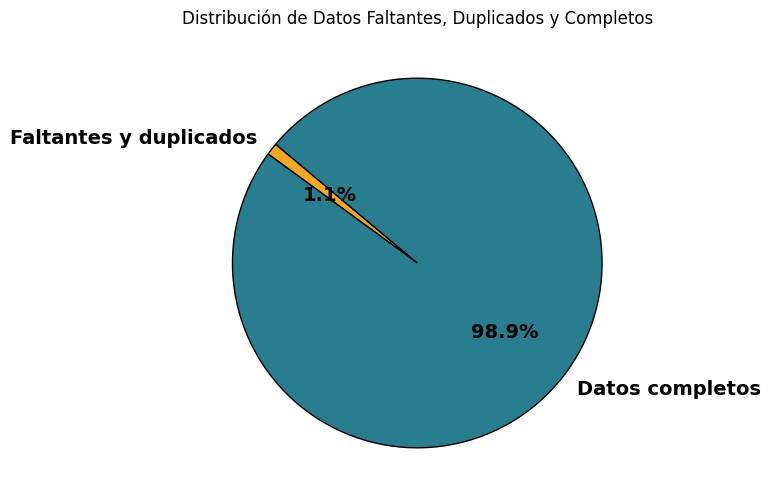

In [14]:
# Calculo de  porcentajes
registros = cant_registros_inicial
duplicados_y_faltantes = cant_dup + cant_filas_null

# Imprimiendo cantidad de registros duplicados y faltantes
print("Cantidad de Duplicados y Faltantes:",duplicados_y_faltantes)
# Imprimiendo cantidad de registros
print("Cantidad de Registros:",registros)

diferencia = registros - duplicados_y_faltantes

# Crear los datos y etiquetas para el gráfico de pastel
data = [duplicados_y_faltantes , diferencia]
labels = ['Faltantes y duplicados', 'Datos completos']
colores = ['#F5A623', '#287D8E']

# Gráfico de pastel
plt.figure(figsize=(12, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colores, wedgeprops={'edgecolor': 'black'},textprops={'fontsize': 14, 'fontweight': 'bold'} )
plt.title('Distribución de Datos Faltantes, Duplicados y Completos')
plt.show()

In [15]:
# Reemplazando los valores nulos con 0
df = df.fillna(0)
# Mostramos la cantidad de valores nulos por columna
nulos_por_columna = df.isnull().sum()
nulos_por_columna

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


In [16]:
# Eliminando los filas duplicadas
df = df.drop_duplicates()

### Redondear Floats

In [17]:
# Redondeamos todos las columnas float a 2 decimales
df[df.select_dtypes(include='float').columns] = df.select_dtypes(include='float').round(2)

## Encontrando Inconsistencias

### Valores Booleanos

In [18]:
# Selecciono las columnas que son booleanas
booleansVariables = df[['Gender', 'Smoking','FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
                        'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems',
                        'Confusion', 'Disorientation', 'PersonalityChanges','DifficultyCompletingTasks',
                        'Forgetfulness', 'Diagnosis']]

# Convertimos todas las columnas booleanas a tipo booleano
# esto transforma los valores 0 a False y todo lo demas a true, ya que un valor diferente de cero se interpreta como "existe algo",
booleansVariables = booleansVariables.astype(bool)

In [19]:
# Aplicando cambios
df[booleansVariables.columns] = booleansVariables

### Valores Categoricos

In [20]:
# establezciendo el conjunto de valores posibles
categoryValues = [0,1,2,3]

# Selecciono las columnas que son categoricas
categoryVariables = df[['Ethnicity', 'EducationLevel']]
categoryVariables = categoryVariables.astype(int)

# verificando si hay valores diferentes a los establecidos
for variable in categoryVariables:
    if np.any(~np.isin(categoryVariables[variable].unique(), categoryValues)):
        print('Hay inconsistencias en la columna:', categoryVariables[variable].name, ', con los valores:',categoryVariables[variable].unique())
    else:
        print('No hay inconsistencias en la columna:', categoryVariables[variable].name)

No hay inconsistencias en la columna: Ethnicity
No hay inconsistencias en la columna: EducationLevel


In [21]:
# Aplicando cambios a la columnas categoricas
df[categoryVariables.columns] = categoryVariables

### Valores Numericos con Rango

In [22]:
# Selecciono las columnas que son numericas pero que tienen rango especifico
rangeVariables = df[['PhysicalActivity', 'DietQuality', 'SleepQuality', 'DiastolicBP',
                    'SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']]

# Establezco los rangos para cada columna
rangesOfVariables = [[0,10],[0,10],[0,10],[60,120],[90,180],[150,300],
                    [50,200],[20,100],[50,400],[0,30],[0,10],[0,10]]

# Convertimos todas las columnas numericas a tipo float
rangeVariables = rangeVariables.astype(float)

# Verifico si los valores de cada columna se encuentran en los rangos especificados
# Si no es asi, los cambio a los valores mas extremos de cada columna
for i, variable in enumerate(rangeVariables):
    if rangeVariables[variable].min() < rangesOfVariables[i][0] or rangeVariables[variable].max() > rangesOfVariables[i][1]:
        print('Hay inconsistencias en la columna:', rangeVariables[variable].name, ', min:', rangeVariables[variable].min(), ', max:', rangeVariables[variable].max())
        outliers = rangeVariables[(rangeVariables[variable] < rangesOfVariables[i][0]) | (df[variable] > rangesOfVariables[i][1])]
        # Imprimimos los valores fuera del rango
        print('Valores fuera del rango', rangesOfVariables[i][0], '-', rangesOfVariables[i][1])
        print(outliers[variable])

        # Cambiamos los valores fuera del rango a los valores de rango min o max segun corresponda
        rangeVariables.loc[rangeVariables[variable] > rangesOfVariables[i][1], variable] = rangesOfVariables[i][1]
        rangeVariables.loc[rangeVariables[variable] < rangesOfVariables[i][0], variable] = rangesOfVariables[i][0]
        print('valores fuera de rango transformados en min:', rangeVariables[variable].min(), 'y max :', rangeVariables[variable].min(), rangeVariables[variable].max())
    else:
        print('Ok:', rangeVariables[variable].name)

Ok: PhysicalActivity
Ok: DietQuality
Hay inconsistencias en la columna: SleepQuality , min: 0.0 , max: 4044547444819932.0
Valores fuera del rango 0 - 10
1469    4.044547e+15
Name: SleepQuality, dtype: float64
valores fuera de rango transformados en min: 0.0 y max : 0.0 10.0
Ok: DiastolicBP
Ok: SystolicBP
Ok: CholesterolTotal
Ok: CholesterolLDL
Ok: CholesterolHDL
Ok: CholesterolTriglycerides
Ok: MMSE
Ok: FunctionalAssessment
Hay inconsistencias en la columna: ADL , min: 0.0 , max: 1.1598653555641624e+16
Valores fuera del rango 0 - 10
1192    1.159865e+16
1737    5.508254e+15
1853    1.758704e+15
2136    6.642847e+15
Name: ADL, dtype: float64
valores fuera de rango transformados en min: 0.0 y max : 0.0 10.0


In [23]:
df[rangeVariables.columns] = rangeVariables

## Tratamiento de Outliers

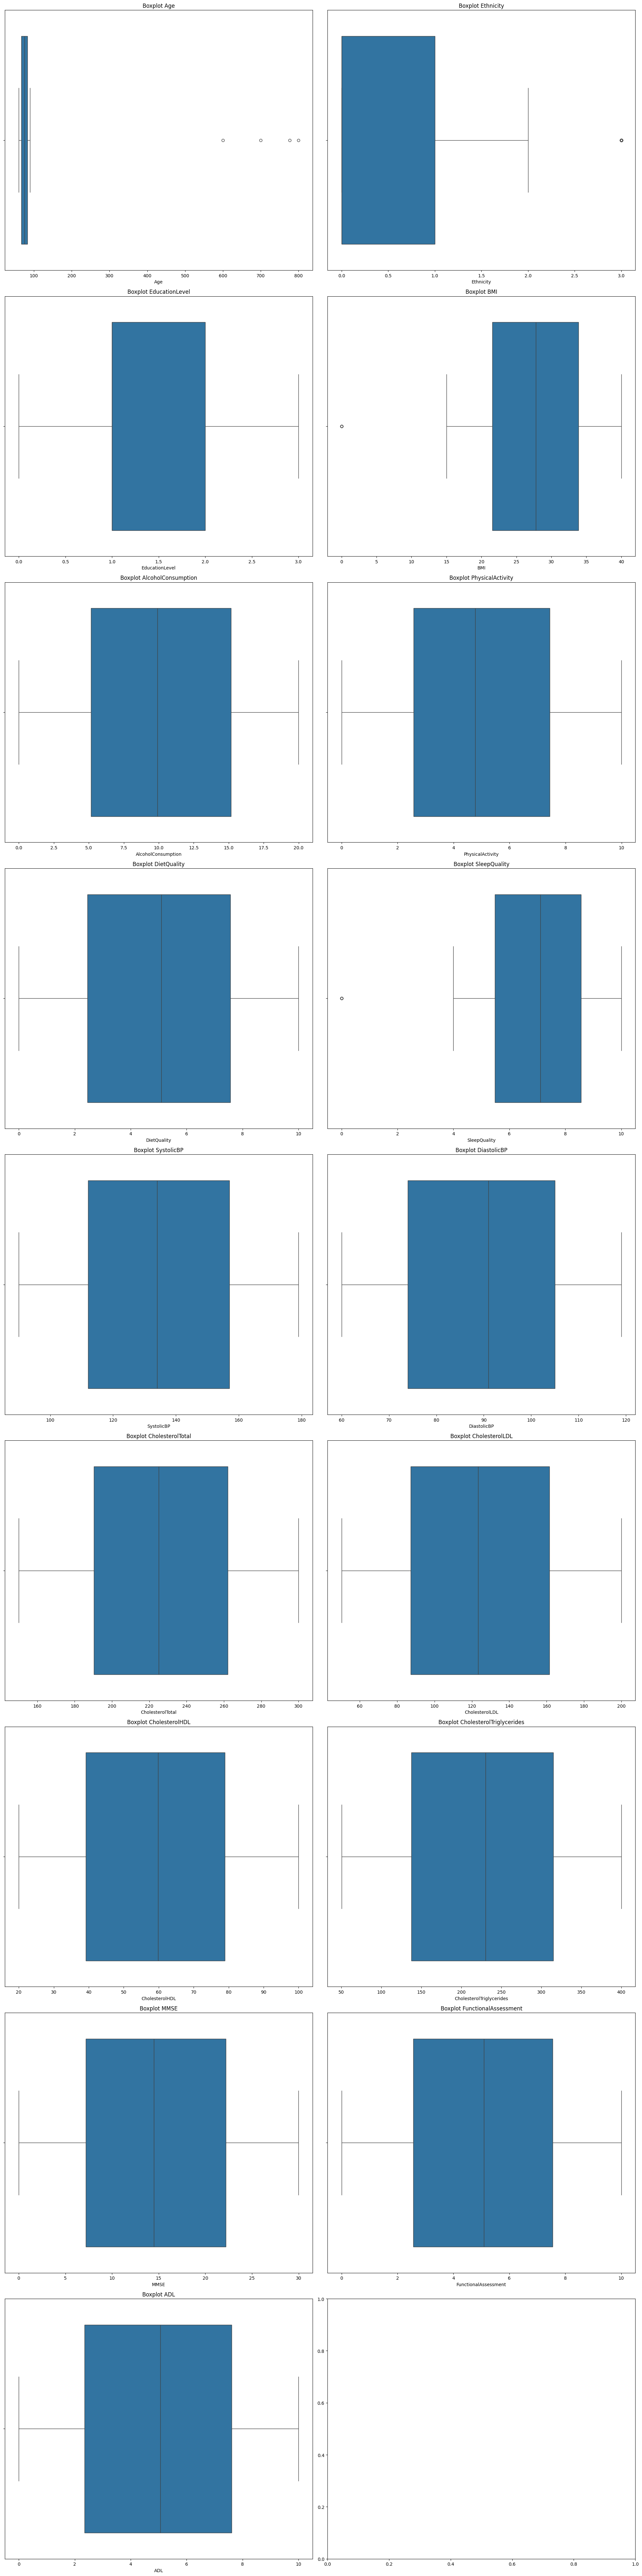

In [24]:
# Identificar columnas no binarias
non_binary_columns = [col for col in df.columns if df[col].nunique() > 2]

# Filtrar solo columnas no binarias numéricas
numeric_non_binary_columns = [col for col in non_binary_columns if df[col].dtype in ['float64', 'int64']]

# Configurar la figura con subgráficos 4x4
fig, axes = plt.subplots(9, 2, figsize=(20, 80))

axes = axes.flatten()
# Graficar boxplots por separado
for i, col in enumerate(numeric_non_binary_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()


In [25]:
df = df[(df['Age'] <= 100)]
df = df[(df['BMI'] > 0)]
df = df[(df['SleepQuality'] > 0)]

# Análisis exploratorio

In [26]:
df.describe().round(2)

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2126.00,2126.0,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00
mean,74.94,0.7,1.29,27.65,10.03,4.92,4.99,7.05,134.30,89.85,225.12,124.30,59.45,228.19,14.76,5.08,5.00
std,8.98,1.0,0.91,7.22,5.76,2.86,2.90,1.76,25.99,17.62,42.61,43.36,23.10,102.18,8.61,2.89,2.95
min,60.00,0.0,0.00,15.01,0.00,0.00,0.01,4.00,90.00,60.00,150.09,50.23,20.00,50.41,0.01,0.00,0.00
25%,67.00,0.0,1.00,21.60,5.11,2.55,2.46,5.50,112.00,74.00,190.12,87.14,39.12,137.35,7.18,2.57,2.35
50%,75.00,0.0,1.00,27.78,9.90,4.78,5.08,7.12,134.00,91.00,224.83,123.32,59.70,230.30,14.46,5.09,5.05
75%,83.00,1.0,2.00,33.87,15.16,7.44,7.53,8.56,157.00,105.00,262.04,161.54,78.94,315.21,22.17,7.55,7.60
max,90.00,3.0,3.00,39.99,19.99,9.99,10.00,10.00,179.00,119.00,299.99,199.97,99.98,399.94,29.99,10.00,10.00


# Tratamiento e importancia de variables

### Matriz de Correlación

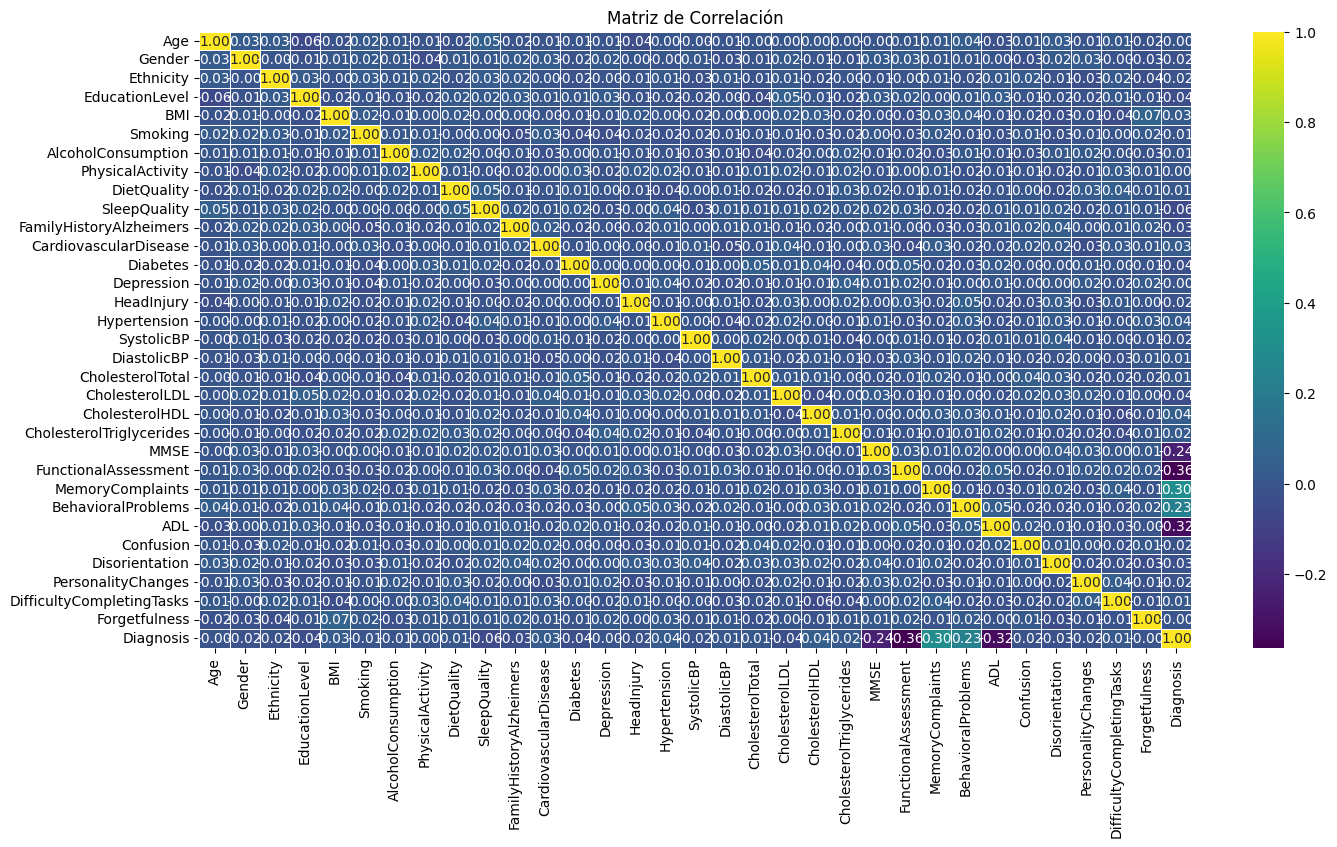

In [27]:
matriz_correlacion = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [28]:
#Esta matriz no es muy amigable, vamos a probar con otro gráfico.

### Relación de la variable target con las demás variables

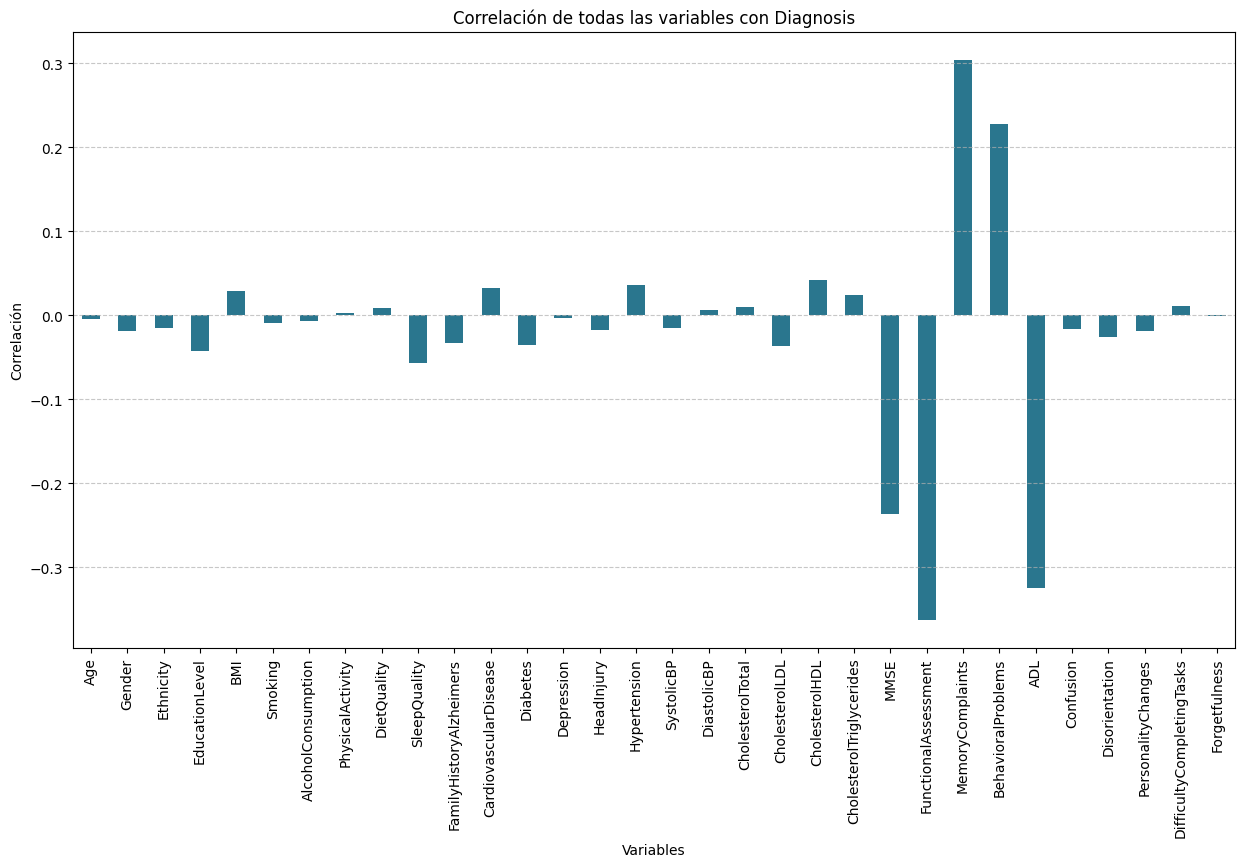

In [29]:
variable_target = 'Diagnosis'
correlaciones = df.corr()[variable_target]
plt.figure(figsize=(15, 8))
correlaciones.drop(variable_target).plot(kind='bar', color=(42/255, 118/255, 142/255))
plt.title(f'Correlación de todas las variables con {variable_target}')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
#Vemos un primer vistazo a las variables de todo el dataset y cuáles tienen más peso.

### Ranking de importancia de cada variable

Accuracy: 0.9389671361502347
              precision    recall  f1-score   support

       False       0.93      0.98      0.95       281
        True       0.95      0.86      0.91       145

    accuracy                           0.94       426
   macro avg       0.94      0.92      0.93       426
weighted avg       0.94      0.94      0.94       426



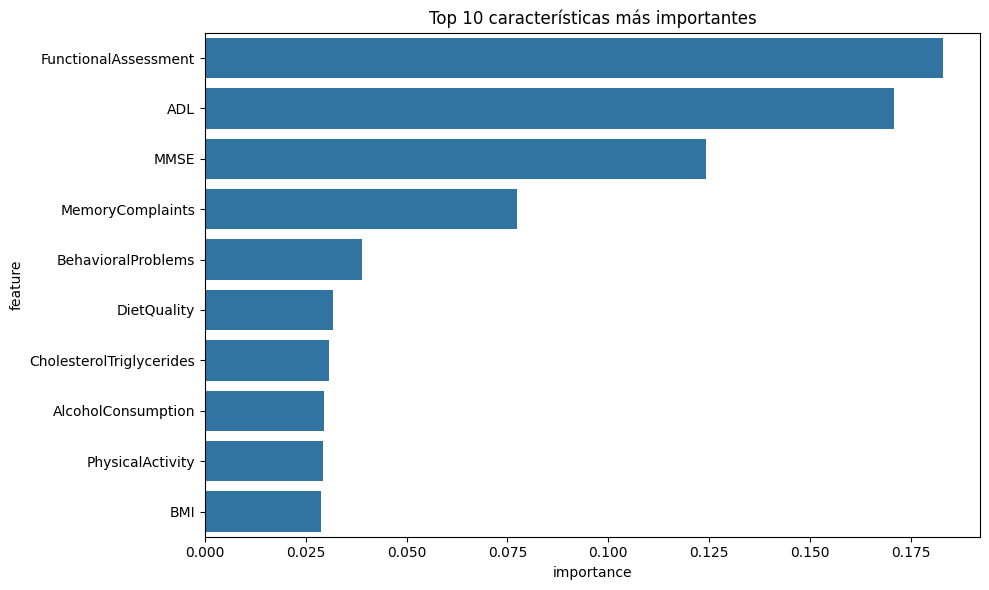

In [31]:
# Definir características y variable objetivo
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Importancia de características
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 características más importantes')
plt.tight_layout()
plt.show()

In [32]:
#Observamos que las 3 variables más importantes tienen relación en base al deterioro del paciente:
'''
FunctionalAssessment: Evalúa la capacidad funcional. Un puntaje más bajo nos indica un mayor deterioro funcional,
puede estar relacionado con un mayor riesgo de Alzheimer.
ADL (Actividades de la Vida Diaria): Mide la capacidad del paciente para realizar actividades cotidianas.
Similar a la evaluación funcional, un puntaje bajo nos sugiere un deterioro que puede estar asociado también
MMSE (Mini-Mental State Examination): Evalúa la función cognitiva. Un puntaje bajo en el MMSE nos indica un fuerte
deterioro cognitivo.
'''

'\nFunctionalAssessment: Evalúa la capacidad funcional. Un puntaje más bajo nos indica un mayor deterioro funcional,\npuede estar relacionado con un mayor riesgo de Alzheimer.\nADL (Actividades de la Vida Diaria): Mide la capacidad del paciente para realizar actividades cotidianas.\nSimilar a la evaluación funcional, un puntaje bajo nos sugiere un deterioro que puede estar asociado también\nMMSE (Mini-Mental State Examination): Evalúa la función cognitiva. Un puntaje bajo en el MMSE nos indica un fuerte\ndeterioro cognitivo.\n'

## Visualización de datos

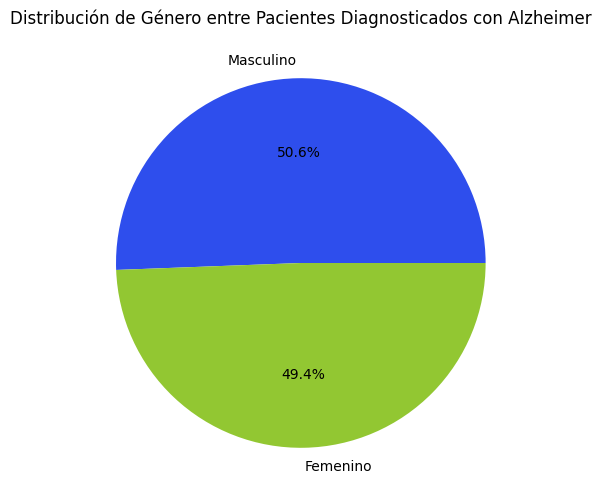

In [33]:
# Filtrar los pacientes diagnosticados con Alzheimer
diagnosed_df = df[df['Diagnosis'] == 1]

# Contar el número de pacientes por género
gender_counts = diagnosed_df['Gender'].value_counts()

# Mapear los valores de género a etiquetas
gender_labels = {False: 'Masculino', True: 'Femenino'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Graficar el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#2e4eed', '#92c732'])
plt.title('Distribución de Género entre Pacientes Diagnosticados con Alzheimer')
plt.show()

In [34]:
#Por poca diferencia hay una mayor cantidad de personas con género masculino aunque no parece ser un indicador importante de predicción.

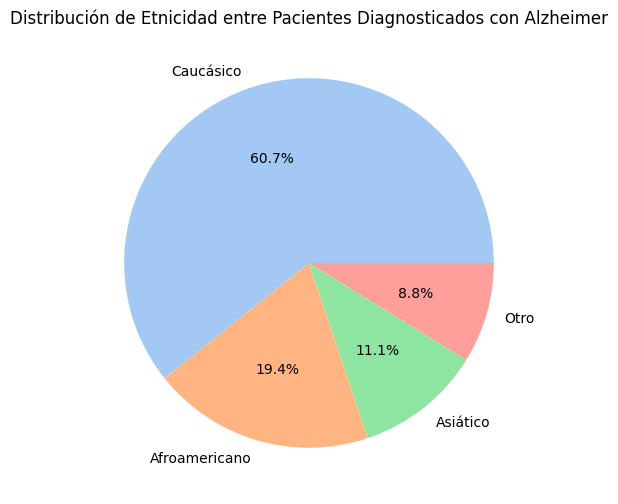

In [35]:
import matplotlib.pyplot as plt
# Filtrar los pacientes diagnosticados con Alzheimer
diagnosed_df = df[df['Diagnosis'] == 1]

# Contar el número de pacientes diagnosticados por etnicidad
ethnicity_counts = diagnosed_df['Ethnicity'].value_counts()

# Mapear los códigos de etnicidad a etiquetas
ethnicity_labels = {0: 'Caucásico', 1: 'Afroamericano', 2: 'Asiático', 3: 'Otro'}
ethnicity_counts.index = ethnicity_counts.index.map(ethnicity_labels)

# Graficar el gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de Etnicidad entre Pacientes Diagnosticados con Alzheimer')
plt.show()

In [36]:
#Mayor etnia de tipo "caucásico" seguida de "Afroamericano".

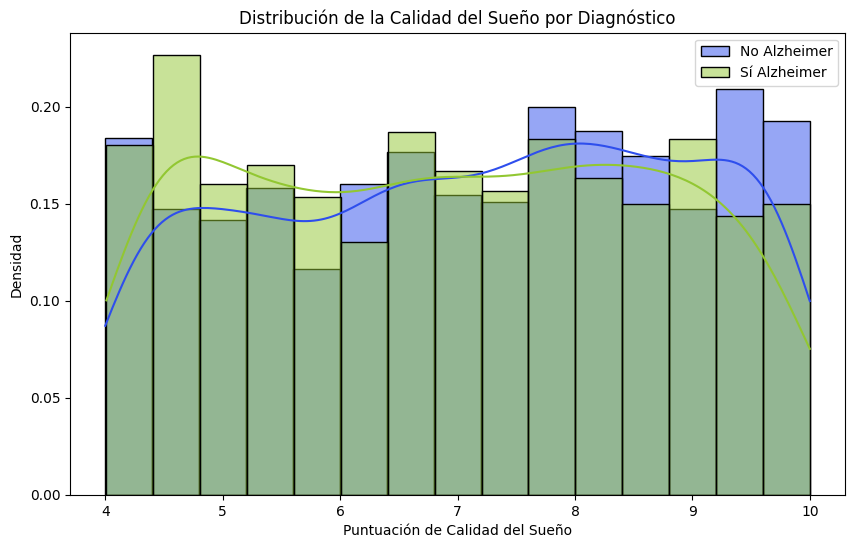

In [37]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10,6))

# Histograma de pacientes no diagnosticados
sns.histplot(df[df['Diagnosis'] == 0]['SleepQuality'], color='#2e4eed', label='No Alzheimer', kde=True, stat='density', bins=15)

# Histograma de pacientes diagnosticados
sns.histplot(df[df['Diagnosis'] == 1]['SleepQuality'], color='#92c732', label='Sí Alzheimer', kde=True, stat='density', bins=15)

# Añadir etiquetas y título
plt.title('Distribución de la Calidad del Sueño por Diagnóstico')
plt.xlabel('Puntuación de Calidad del Sueño')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [38]:
#Se observa que a mayor nivel de calidad del sueño aumentan la densidad de personas sin Alzheimer y disminuyen los pacientes con Alzheimer.
#La mayor densidad de pacientes con Alzheimer se ubican entre los niveles 4 y 5, se observa sin embargo que en el
#nivel más bajo de sueño hay un poco más de densidad de personas sin Alzheimer.

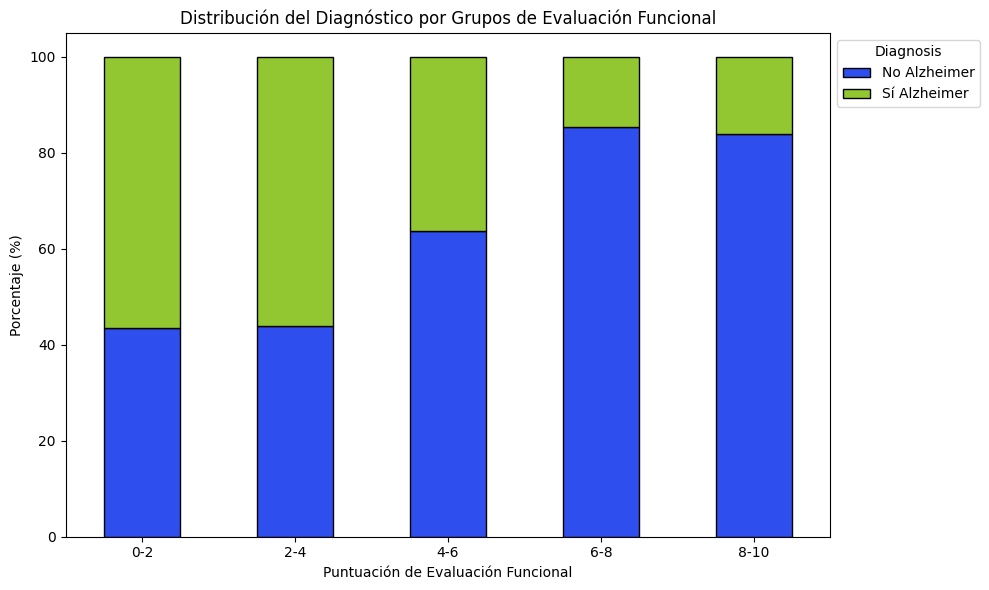

In [39]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
fa_group = pd.cut(df['FunctionalAssessment'], bins=bins, labels=labels, include_lowest=True)

# Crear un nuevo DataFrame 'df_group' que incluye 'FunctionalAssessmentGroup' y 'Diagnosis'
df_group = pd.DataFrame({
  'FunctionalAssessmentGroup': fa_group,
  'Diagnosis': df['Diagnosis']
})

# Contar el número de diagnósticos por grupo
counts = df_group.groupby(['FunctionalAssessmentGroup', 'Diagnosis']).size().unstack(fill_value=0)

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Graficar barras apiladas
ax = percentages.plot(
  kind='bar',
  stacked=True,
  color=['#2e4eed', '#92c732'],  # Asegúrate de que los colores correspondan a las clases correctas
  edgecolor='black',
  figsize=(10, 6)
)

# Añadir etiquetas y título
plt.title('Distribución del Diagnóstico por Grupos de Evaluación Funcional')
plt.xlabel('Puntuación de Evaluación Funcional')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Añadir leyenda
plt.legend(
  title='Diagnosis',
  labels=['No Alzheimer', 'Sí Alzheimer'],
  loc='upper left',
  bbox_to_anchor=(1, 1)
)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [40]:
#Se observa que en los puntajes más bajos de evaluación funcional predominan los pacientes con Alzheimer
#lo que indica un mayor deterioro y un fuerte indicador.

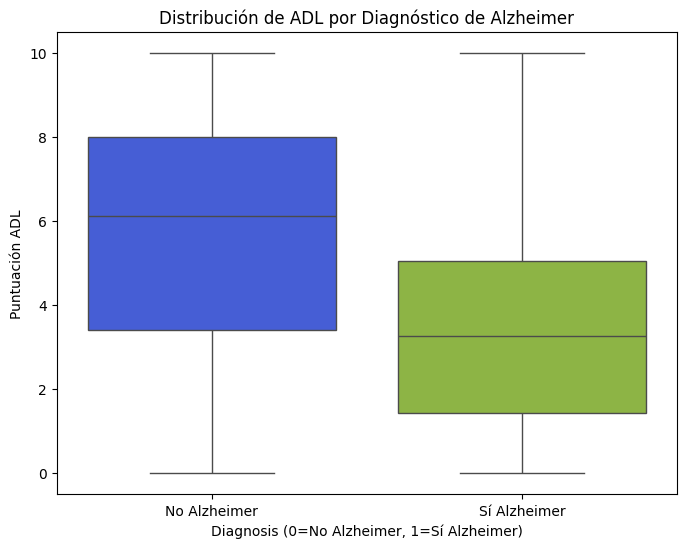

In [41]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='Diagnosis', y='ADL', data=df, palette=['#2e4eed', '#92c732'])

# Añadir etiquetas y título
plt.title('Distribución de ADL por Diagnóstico de Alzheimer')
plt.xlabel('Diagnosis (0=No Alzheimer, 1=Sí Alzheimer)')
plt.ylabel('Puntuación ADL')

# Ajustar etiquetas del eje x
plt.xticks([0, 1], ['No Alzheimer', 'Sí Alzheimer'])

# Mostrar el gráfico
plt.show()

In [42]:
#Un puntaje bajo de ADL significa una menor capacidad para realizar actividades, se refleja que los pacientes con
#Alzheimer presentan niveles bajos también siendo un fuerte indicador de factor asociado.

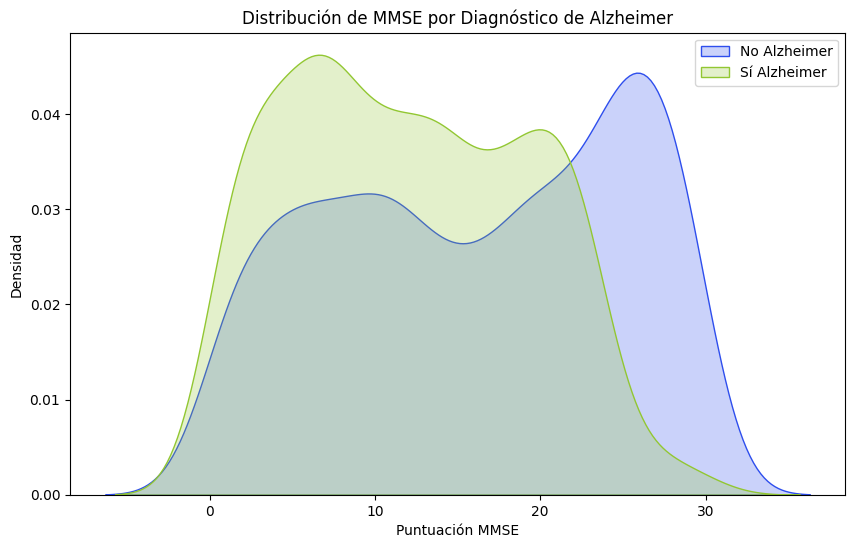

In [43]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Definir los colores
colors = ['#2e4eed', '#92c732']

# Graficar distribuciones con los colores especificados
sns.kdeplot(data=df[df['Diagnosis'] == 0]['MMSE'], label='No Alzheimer', shade=True, color=colors[0])
sns.kdeplot(data=df[df['Diagnosis'] == 1]['MMSE'], label='Sí Alzheimer', shade=True, color=colors[1])

# Añadir etiquetas y título
plt.title('Distribución de MMSE por Diagnóstico de Alzheimer')
plt.xlabel('Puntuación MMSE')
plt.ylabel('Densidad')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [44]:
#Se observa que en la mayor puntuación de MMSE hay un pico de personas sin Alzheimer y, por el contrario, en las
#menores puntuaciones de MMSE se encuentran los pacientes y al llegar a la mayor puntuación disminuyen notablemente.

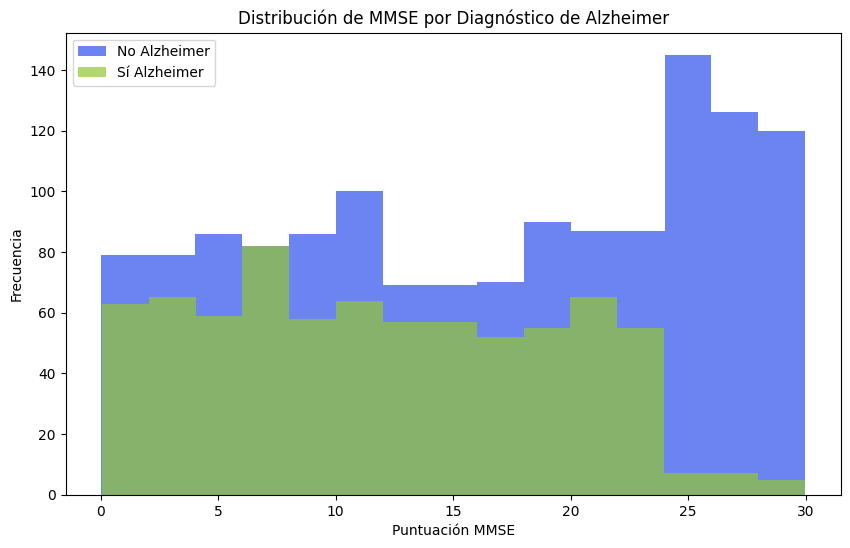

In [45]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar histogramas con los colores especificados
plt.hist(df[df['Diagnosis'] == 0]['MMSE'], bins=15, alpha=0.7, label='No Alzheimer', color=colors[0])
plt.hist(df[df['Diagnosis'] == 1]['MMSE'], bins=15, alpha=0.7, label='Sí Alzheimer', color=colors[1])

# Añadir etiquetas y título
plt.title('Distribución de MMSE por Diagnóstico de Alzheimer')
plt.xlabel('Puntuación MMSE')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

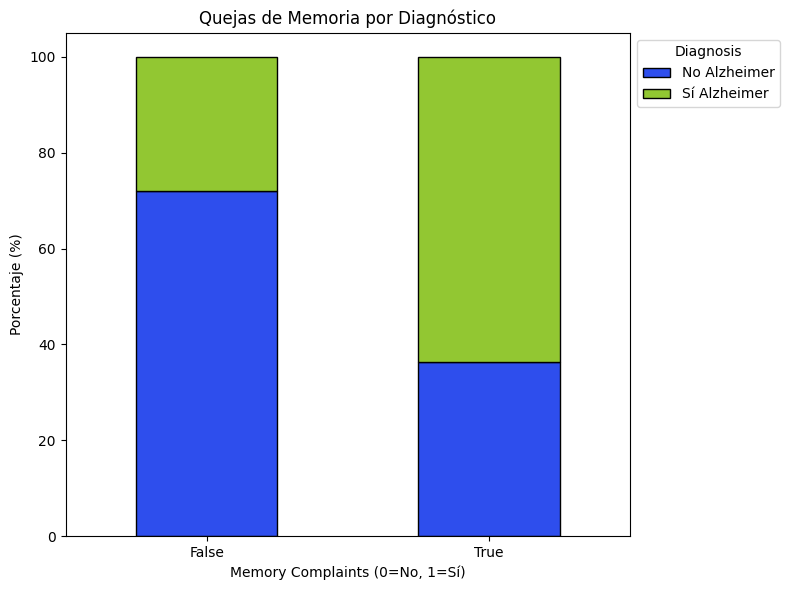

In [46]:
# Crear una tabla cruzada
counts = pd.crosstab(df['MemoryComplaints'], df['Diagnosis'])

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Graficar barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#2e4eed', '#92c732'], edgecolor='black', figsize=(8, 6))

# Añadir etiquetas y título
plt.title('Quejas de Memoria por Diagnóstico')
plt.xlabel('Memory Complaints (0=No, 1=Sí)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Añadir leyenda
plt.legend(title='Diagnosis', labels=['No Alzheimer', 'Sí Alzheimer'], loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [47]:
#La memoria también es un factor importante superando el 60% el sí para los pacientes que presentan quejas.

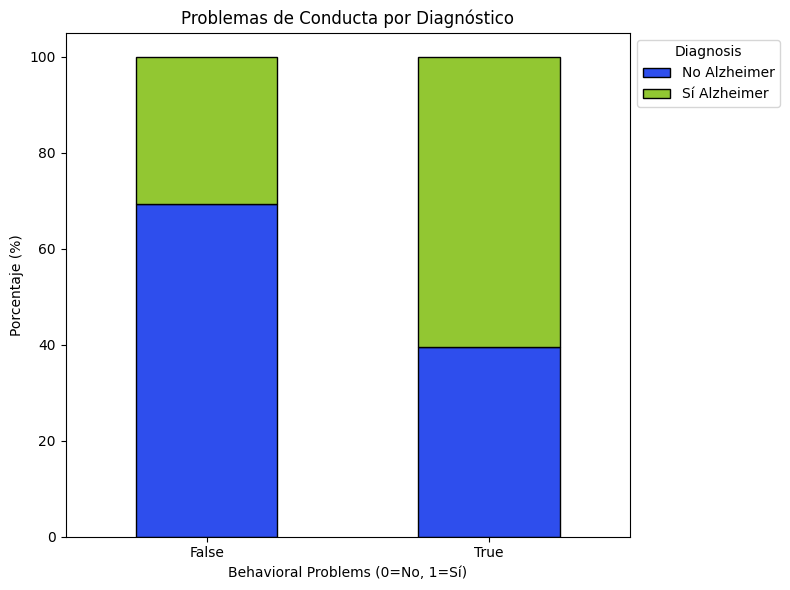

In [48]:
# Crear una tabla cruzada
counts = pd.crosstab(df['BehavioralProblems'], df['Diagnosis'])

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Graficar barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#2e4eed', '#92c732'], edgecolor='black', figsize=(8, 6))

# Añadir etiquetas y título
plt.title('Problemas de Conducta por Diagnóstico')
plt.xlabel('Behavioral Problems (0=No, 1=Sí)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Añadir leyenda
plt.legend(title='Diagnosis', labels=['No Alzheimer', 'Sí Alzheimer'], loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [49]:
#Otro factor que se refleja mucho son los problemas de conducta con un porcentaje similar a las quejas por memoria.

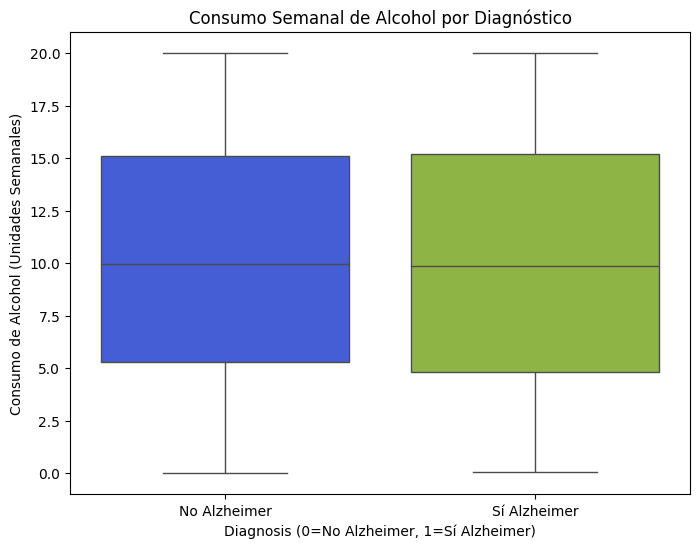

In [50]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df, palette=['#2e4eed', '#92c732'])

# Añadir etiquetas y título
plt.title('Consumo Semanal de Alcohol por Diagnóstico')
plt.xlabel('Diagnosis (0=No Alzheimer, 1=Sí Alzheimer)')
plt.ylabel('Consumo de Alcohol (Unidades Semanales)')

# Ajustar etiquetas del eje x
plt.xticks([0, 1], ['No Alzheimer', 'Sí Alzheimer'])

# Mostrar el gráfico
plt.show()

In [51]:
#No parece ser un fuerte indicador, ambos están parejos y el Si presenta una mayor distribución.

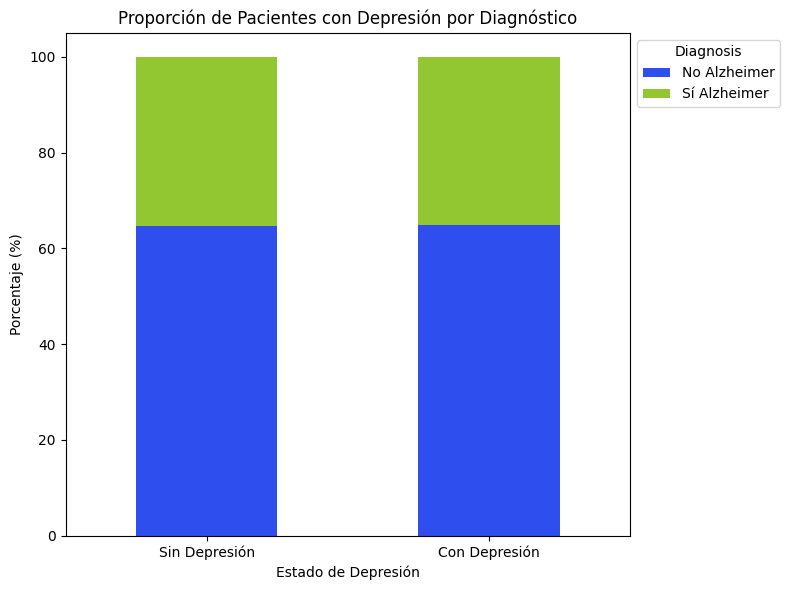

In [52]:
# Crear una tabla cruzada
counts = pd.crosstab(df['Depression'], df['Diagnosis'])

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Mapear los valores de depresión a etiquetas
depression_labels = {False: 'Sin Depresión', True: 'Con Depresión'}
percentages.index = percentages.index.map(depression_labels)

# Graficar barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#2e4eed', '#92c732'], figsize=(8, 6))

# Añadir etiquetas y título
plt.title('Proporción de Pacientes con Depresión por Diagnóstico')
plt.xlabel('Estado de Depresión')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Añadir leyenda
plt.legend(title='Diagnosis', labels=['No Alzheimer', 'Sí Alzheimer'], loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [53]:
#Tampoco parece ser un fuerte indicador la depresión.

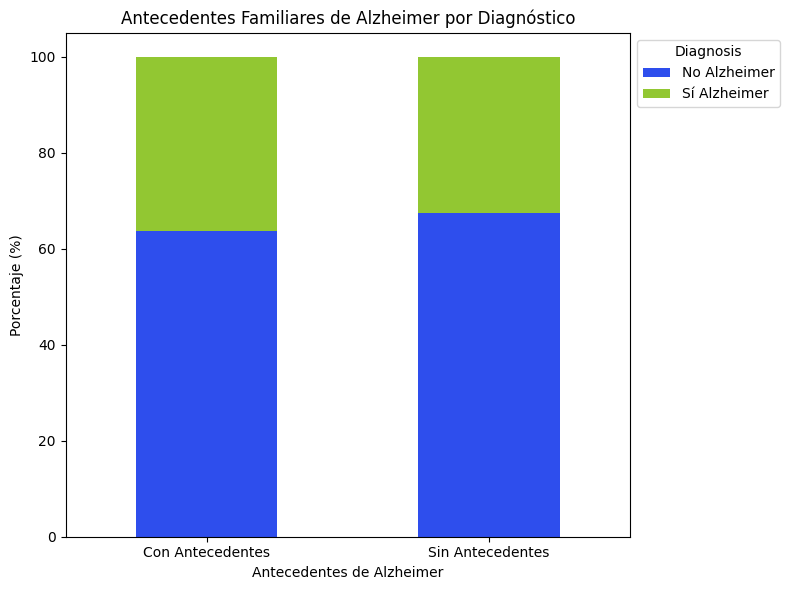

In [54]:
# Crear una tabla cruzada
counts = pd.crosstab(df['FamilyHistoryAlzheimers'], df['Diagnosis'])

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Mapear los valores de antecedentes familiares a etiquetas
family_history_labels = {True: 'Sin Antecedentes', False: 'Con Antecedentes'}
percentages.index = percentages.index.map(family_history_labels)

# Graficar barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#2e4eed', '#92c732'], figsize=(8, 6))

# Añadir etiquetas y título
plt.title('Antecedentes Familiares de Alzheimer por Diagnóstico')
plt.xlabel('Antecedentes de Alzheimer')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Añadir leyenda
plt.legend(title='Diagnosis', labels=['No Alzheimer', 'Sí Alzheimer'], loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [55]:
#Tampoco parece ser un factor determinante los antecedentes familiares.

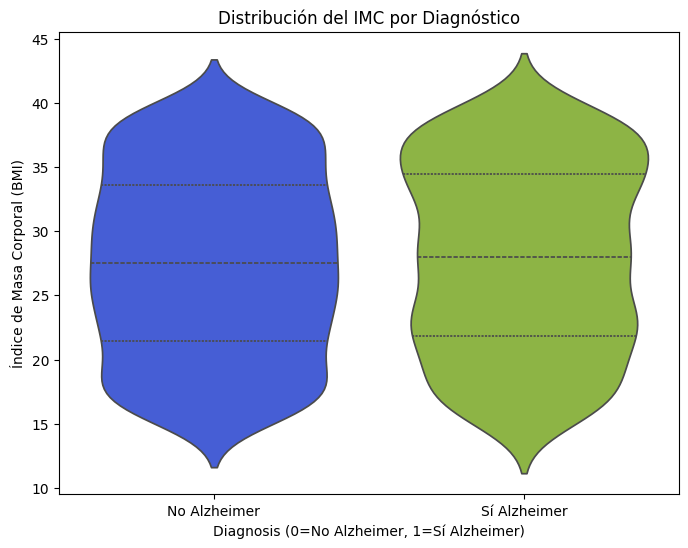

In [56]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el gráfico de violín
sns.violinplot(x='Diagnosis', y='BMI', data=df, palette=['#2e4eed', '#92c732'], inner='quartile')

# Añadir etiquetas y título
plt.title('Distribución del IMC por Diagnóstico')
plt.xlabel('Diagnosis (0=No Alzheimer, 1=Sí Alzheimer)')
plt.ylabel('Índice de Masa Corporal (BMI)')

# Ajustar etiquetas del eje x
plt.xticks([0, 1], ['No Alzheimer', 'Sí Alzheimer'])

# Mostrar el gráfico
plt.show()

In [57]:
#No parece ser un factor determinante

# Pycaret

In [58]:
#pip install pycaret[full]

In [59]:
"""
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'Diagnosis', session_id = 123)
"""

"\n# loading sample dataset from pycaret dataset module\nfrom pycaret.datasets import get_data\n# import pycaret classification and init setup\nfrom pycaret.classification import *\ns = setup(df, target = 'Diagnosis', session_id = 123)\n"

In [60]:
# compare baseline models
#best = compare_models()

In [61]:
# plot confusion matrix
#plot_model(best, plot = 'confusion_matrix')

In [62]:
# plot AUC
#plot_model(best, plot = 'auc')

In [63]:
# plot AUC
#plot_model(best, plot = 'auc')

In [64]:
# plot feature importance
#plot_model(best, plot = 'feature')

In [65]:
# list of top 3 models by Recall
#best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)
#best_recall_models_top3

# Modelado

Luego de usar Pycaret para la elección de modelos, se decidió probar con Random Forest, Gradient Boosting y Cat Boost

Exactitud del modelo: 0.9366197183098591
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.93      0.98      0.95       281
        True       0.96      0.85      0.90       145

    accuracy                           0.94       426
   macro avg       0.94      0.92      0.93       426
weighted avg       0.94      0.94      0.94       426



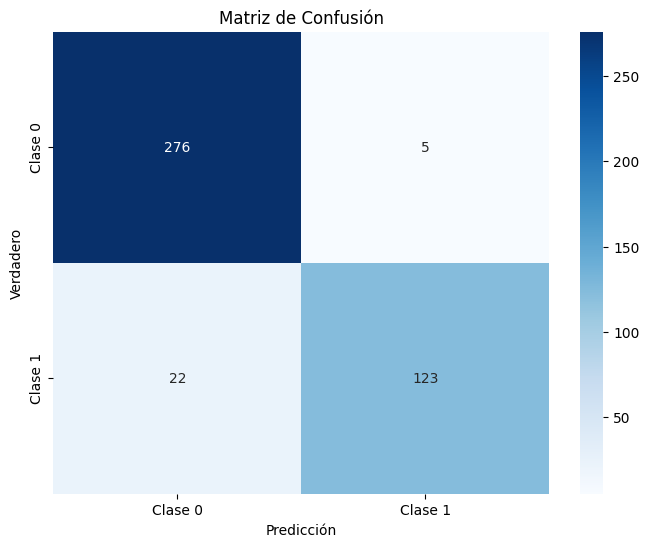

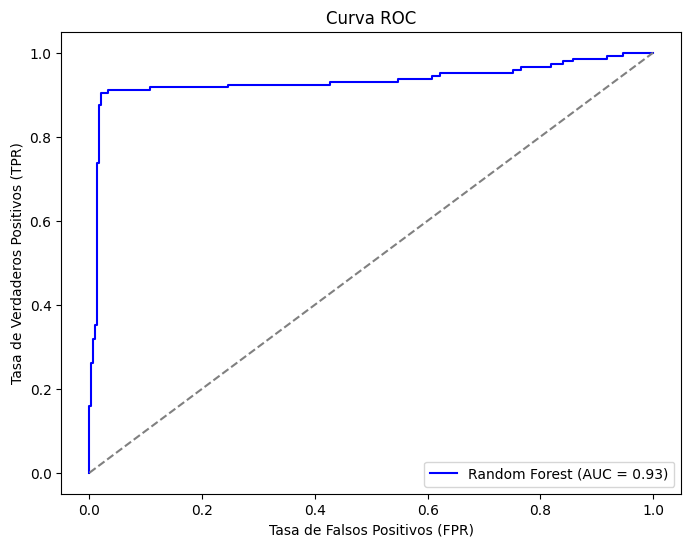

In [66]:
# Definir las variables predictoras y la variable objetivo
X = df.drop('Diagnosis', axis=1)  # Características
y = df['Diagnosis']  # Objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC y AUC
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

Exactitud del modelo: 0.9507042253521126
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       281
        True       0.94      0.91      0.93       145

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426



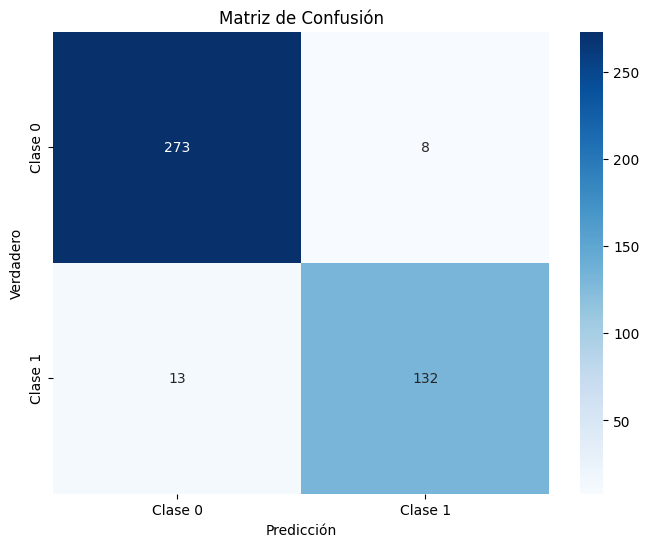

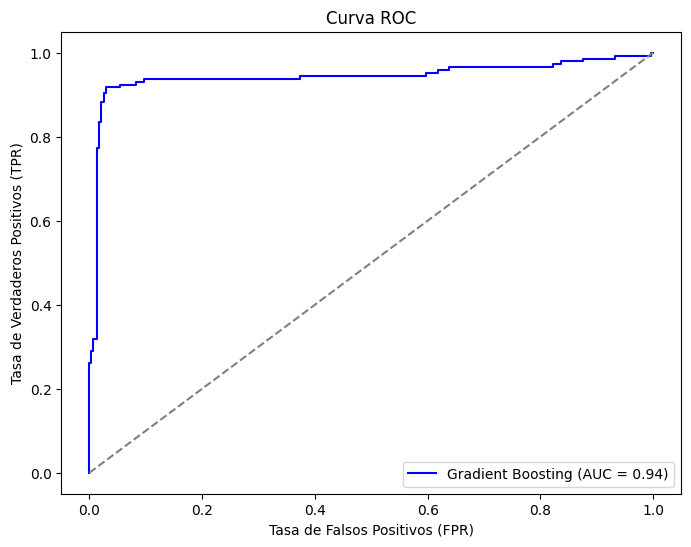

In [67]:
# Definir las variables predictoras y la variable objetivo
X = df.drop('Diagnosis', axis=1)  # Características
y = df['Diagnosis']  # Objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred = gb_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC y AUC
y_prob = gb_classifier.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

0:	learn: 0.5804757	total: 61.4ms	remaining: 1m 1s
100:	learn: 0.0758240	total: 1.37s	remaining: 12.2s
200:	learn: 0.0318480	total: 2.49s	remaining: 9.9s
300:	learn: 0.0173361	total: 3.47s	remaining: 8.06s
400:	learn: 0.0107930	total: 4.58s	remaining: 6.85s
500:	learn: 0.0080742	total: 5.92s	remaining: 5.9s
600:	learn: 0.0066470	total: 7.57s	remaining: 5.02s
700:	learn: 0.0057874	total: 9.45s	remaining: 4.03s
800:	learn: 0.0050800	total: 11s	remaining: 2.73s
900:	learn: 0.0045089	total: 11.4s	remaining: 1.25s
999:	learn: 0.0041979	total: 11.9s	remaining: 0us
Accuracy: 0.9530516431924883
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       281
        True       0.96      0.90      0.93       145

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



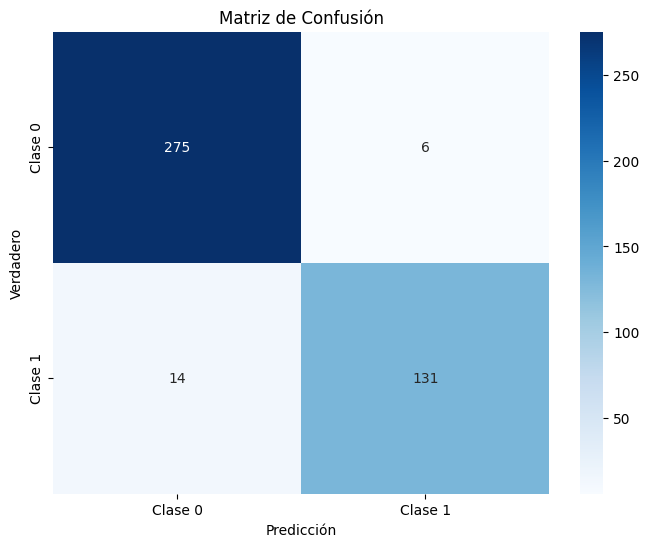

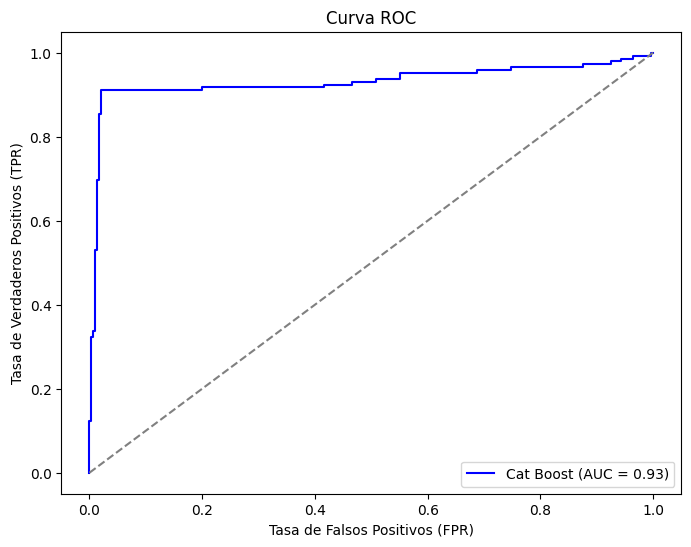

In [68]:
# Definir las variables predictoras y la variable objetivo
X = df.drop('Diagnosis', axis=1)  # Características
y = df['Diagnosis']  # Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo CatBoostClassifier
cb_classifier = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
cb_classifier.fit(X_train, y_train, cat_features=[])

# Hacer predicciones y evaluar el modelo
y_pred = cb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC y AUC
y_prob = cb_classifier.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Cat Boost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

La decisión final fue quedarse con el modelo de Gradiant Boosting por tener un gran accuracy y auc, y por tener un mejor recall, teniendo más equilibrio entre la predicción de las dos clasificaciones posibles.

# Conclusión

Repasando paso por paso:

-La mayor dificultad de la limpieza fue el tratamiento de inconsistencias y outliers

-Luego analizamos las variables para ver las que tenían mas importancia

-Finalmente probamos varios modelos y mediante métricas tomamos una decisión

Haciendo la limpieza de datos tuvimos algunas discrepancias pero llegamos a un acuerdo.
 Y si bien ninguna variable tiene una gran importancia para la predicción,
 la suma de estas hace que el modelo sea más preciso.
 Al final el modelo elegido fue gradiant boosting por estar más equilibrado. Sus métricas fueron estas:

  
        Precisión Recall F1-score
    0   0.95      0.97   0.96
    1   0.94      0.91   0.93
    
    Accuracy: 0.95    AUC: 0.94


Ya cerrando cabe recalcar la importancia de las variables
 que pudimos identificar como mayores síntomas,
 que son las quejas sobre la memoria
y los problemas repentinos de conducta en la personas
. También pudimos ver que es importante realizar actividades diarias
 que ayuden a agilizar la mente, sobre todo en personas
 más envejecidas.
 Teniendo en cuenta todo esto se puede prevenir
 o ayudar a tratar mejor el alzheimer.